In [20]:
import librosa
x, sr = librosa.load('data/x.wav')

In [21]:
print(x.shape)
print(sr)

(87495,)
22050


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

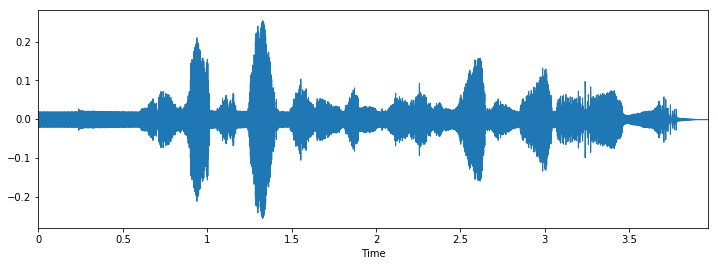

In [23]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [24]:
import IPython.display as ipd
ipd.Audio(x, rate=sr) # load a local WAV file

In [6]:
import numpy as np
from cmath import pi

### Fourier eigen vectors

In [7]:
N=1600
f = np.array(range(N),ndmin=2)
n = np.array(range(N), ndmin=2)
F = np.exp(-1j*(2*pi*np.dot(f.T, n)/N), dtype=np.complex).T
print(y.shape)

NameError: name 'y' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("real")
plt.imshow(F.real)
plt.show()
plt.title("imag")
plt.imshow(F.imag)
plt.show()

### Data matrix preparation

In [12]:
import scipy
bell_curve = scipy.signal.gaussian(M=1600, std=267)
signal_len = x.shape[0]
X = (x[:N] * bell_curve).reshape((N, 1))
# print(x[:N], bell_curve, X)
skip_indices = int(N/2)
start = skip_indices

while True:
    hann_window = (x[start:start+N] * bell_curve).reshape((N, 1))
    X = np.concatenate((X, hann_window), axis=1)
    start += skip_indices
    if start+N  > signal_len:
        break
print(X.shape)

(1600, 108)


### Data matrix in Fourier eigen space

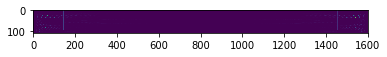

In [13]:
FX = np.dot(F, X)
power_FX = np.absolute(FX)
plt.figure()
plt.imshow(power_FX.T)
plt.show()

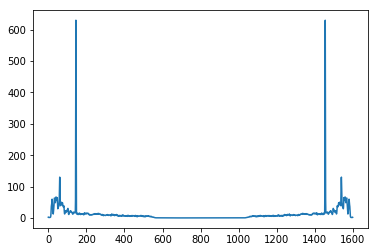

In [14]:
plt.plot(range(N), power_FX.T.sum(axis=0))
plt.show()

### Beep removal

In [15]:
FX[np.absolute(FX).sum(axis=1) > 50,] = 0

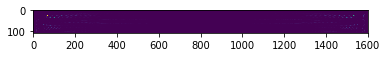

In [16]:
power_FX = np.absolute(FX)
plt.figure()
plt.imshow(power_FX.T)
plt.show()

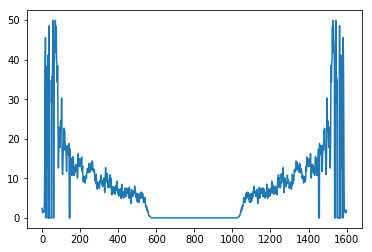

In [17]:
plt.plot(range(N), power_FX.T.sum(axis=0))
plt.show()

### Inverse Fourier Transform

In [18]:
X_recovered = (1/N) * np.dot(FX.T, np.exp(-1j*(2*pi*np.dot(f.T, n)/N))).real

### signal reconstruction

In [19]:
x_recovered = np.zeros(X_recovered.shape[0]*X_recovered.shape[1])
start = 0
i = 0
while True:
    x_recovered[start:start+N] += X_recovered[i,]
    start += skip_indices
    i += 1
    if start+N  > signal_len:
        break
        
ipd.Audio(x_recovered, rate=sr) # load a local WAV file

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x_recovered, sr=sr)